In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
# from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import pandas as pd

# **Create data**

In [ ]:
N = 1000
X = np.random.random((N,2)) * 6 -3 # uniform distribution between [-3;3]
y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This creates the function: 

$y = cos(2x_{1}) + cos(3x_{2})$

# **Plot**

In [ ]:
plot_df = pd.DataFrame(data={'X':X[:,0], 'Z':X[:,1], 'y':y})
fig = px.scatter_3d(plot_df, x='X', y='Z', z='y', color='y', title='3D plot')
fig.show()

# **Model**

In [ ]:
model = nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128,1)
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# **Training**

In [ ]:
n_epochs = 1000
train_losses = np.zeros(n_epochs)

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32)).reshape(-1,1)

for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  loss.backward()
  optimizer.step()

  train_losses[it] = loss.item()

  if (it+1) % 100 == 0:
    print(f'Epoch {it+1}/{n_epochs}, train loss: {loss:.4f}')  

Epoch 100/1000, train loss: 0.4561
Epoch 200/1000, train loss: 0.2623
Epoch 300/1000, train loss: 0.0488
Epoch 400/1000, train loss: 0.0105
Epoch 500/1000, train loss: 0.0046
Epoch 600/1000, train loss: 0.0038
Epoch 700/1000, train loss: 0.0028
Epoch 800/1000, train loss: 0.0026
Epoch 900/1000, train loss: 0.0024
Epoch 1000/1000, train loss: 0.0025


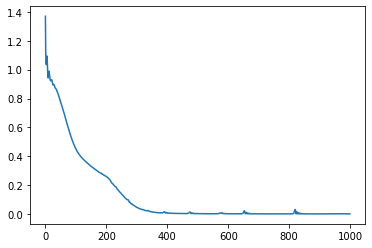

In [ ]:
plt.plot(train_losses)

# **Plot the prediction surface**

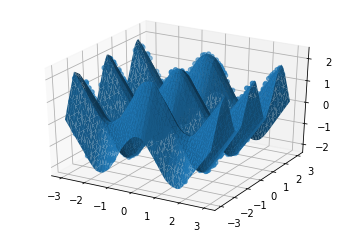

In [ ]:
def plot_pred_surface(lim_x, lim_y, interval):
  # prediction surface
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X[:,0], X[:,1], y)

  # surface plot
  with torch.no_grad():
    line = np.linspace(lim_x, lim_y, interval)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T # stacks the arrays vertically and transpose
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], yhat, linewidth=0.2, antialiased=True)
    plt.show()

plot_pred_surface(-3, 3, 50)

# **Extrapolation ?**

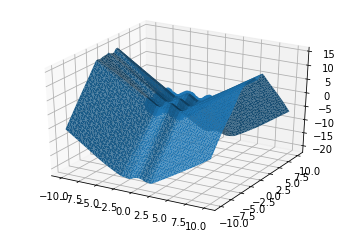

In [ ]:
plot_pred_surface(-10, 10, 50)

# **Conclusion:**

The model is able to approximate sine functions locally, however the prediction function is not periodic, therefore the surface is not fitted how we would expect outside the training area.